In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['city_encoded'] = le.fit_transform(df['city'])

In [4]:
print(df.dtypes)

df = df.apply(pd.to_numeric, errors='coerce')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print(f"Original rows: {df.shape[0]}, Cleaned rows: {df_cleaned.shape[0]}")
df_cleaned

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
city_encoded       int32
dtype: object
Original rows: 4600, Cleaned rows: 3448


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,city_encoded
0,NaN,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,NaN,NaN,NaN,NaN,36
2,NaN,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,NaN,NaN,NaN,NaN,18
3,NaN,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,NaN,NaN,NaN,NaN,3
4,NaN,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,NaN,NaN,NaN,NaN,31
5,NaN,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,NaN,NaN,NaN,NaN,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,NaN,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,NaN,NaN,NaN,NaN,35
4596,NaN,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,NaN,NaN,NaN,NaN,3
4597,NaN,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,NaN,NaN,NaN,NaN,32
4598,NaN,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,NaN,NaN,NaN,NaN,35


In [5]:
current_year = 2025 
df_cleaned['house_age'] = current_year - df_cleaned['yr_built']

columns_to_drop=['date','street','statezip','country','yr_renovated','sqft_above','yr_built','city']
df_cleaned=df_cleaned.drop(columns_to_drop,axis=1)
df_cleaned

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17988\1824263343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['house_age'] = current_year - df_cleaned['yr_built']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,city_encoded,house_age
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,0,36,70
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,0,18,59
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,3,62
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,800,31,49
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,0,35,87
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,0,35,71
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,0,3,42
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,0,32,16
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1020,35,51


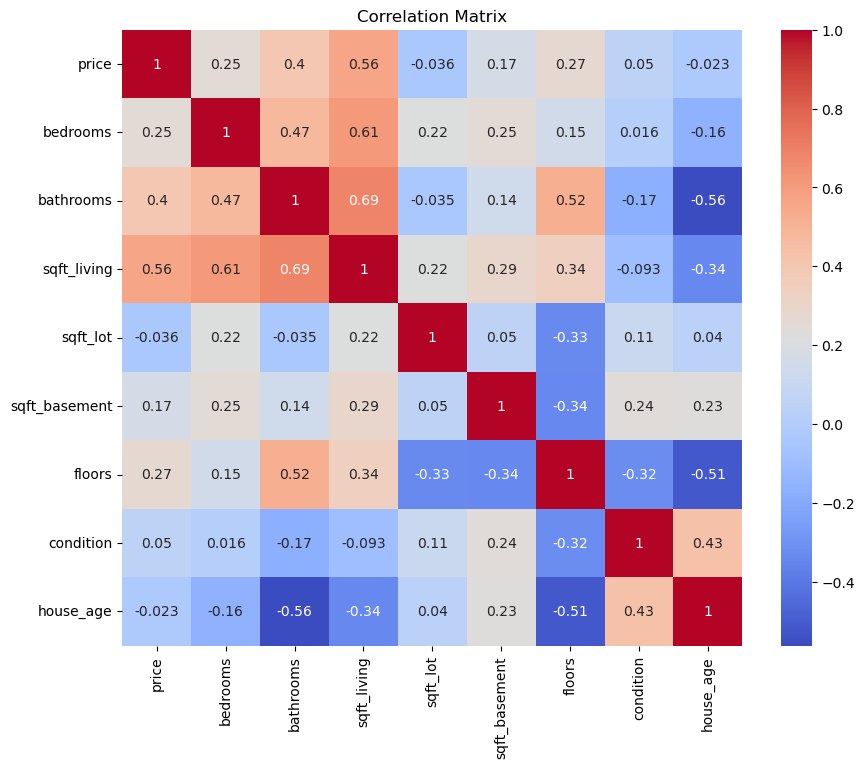

In [6]:
corr_matrix = df_cleaned[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_basement', 'floors', 'condition', 'house_age']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


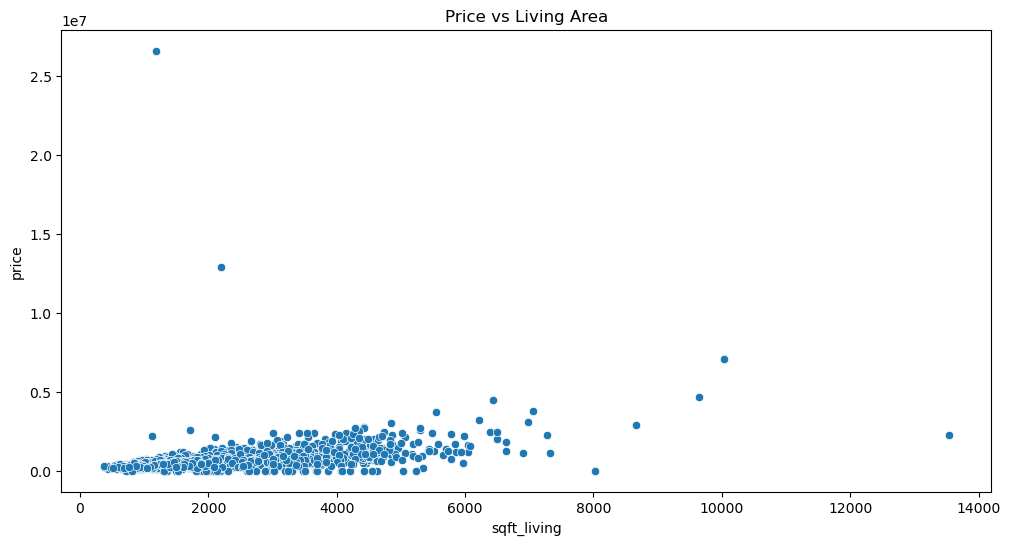

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Living Area')
plt.show()

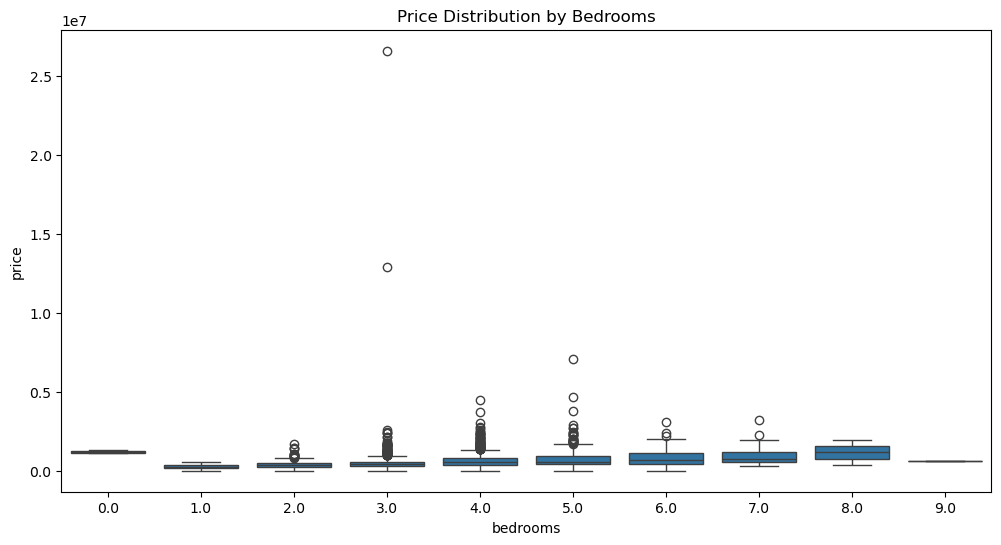

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price Distribution by Bedrooms')
plt.show()

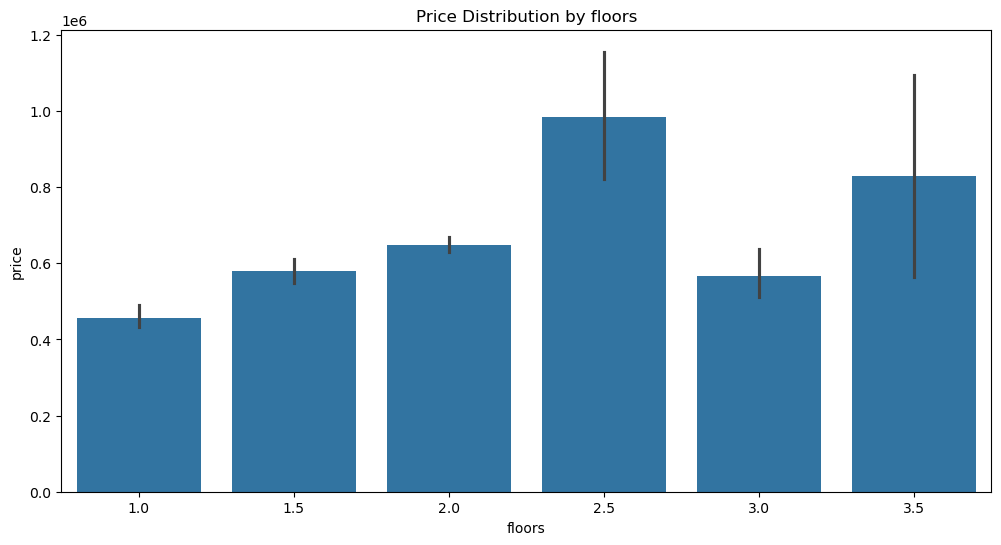

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='floors', y='price', data=df)
plt.title('Price Distribution by floors')
plt.show()

In [10]:
x=df_cleaned.drop(columns=['price'],axis=1)
y=df_cleaned['price']

y=y.round().astype(int)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,city_encoded,house_age
0,3.0,1.50,1340,7912,1.5,0,0,3,0,36,70
2,3.0,2.00,1930,11947,1.0,0,0,4,0,18,59
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,3,62
4,4.0,2.50,1940,10500,1.0,0,0,4,800,31,49
5,2.0,1.00,880,6380,1.0,0,0,3,0,35,87
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,0,35,71
4596,3.0,2.50,1460,7573,2.0,0,0,3,0,3,42
4597,3.0,2.50,3010,7014,2.0,0,0,3,0,32,16
4598,4.0,2.00,2090,6630,1.0,0,0,3,1020,35,51


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2758, 11), (690, 11), (2758,), (690,))

In [12]:
steps = [
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
]
rf_pipeline = Pipeline(steps)
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


In [13]:
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"R² Score: {r2:.2f}")  
print(f"RMSE: ${(mse**0.5):,.0f}")  

R² Score: 0.66
RMSE: $115,850


In [14]:
from xgboost import XGBRegressor
steps = [
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor())
]
XGB_pipeline = Pipeline(steps)
XGB_pipeline.fit(X_train, y_train)
y_pred_XGB = rf_pipeline.predict(X_test)


In [15]:
mse = mean_squared_error(y_test, y_pred_XGB)
r2 = r2_score(y_test, y_pred_XGB)

print(f"R² Score: {r2:.2f}")  
print(f"RMSE: ${(mse**0.5):,.0f}")  

R² Score: 0.66
RMSE: $115,850


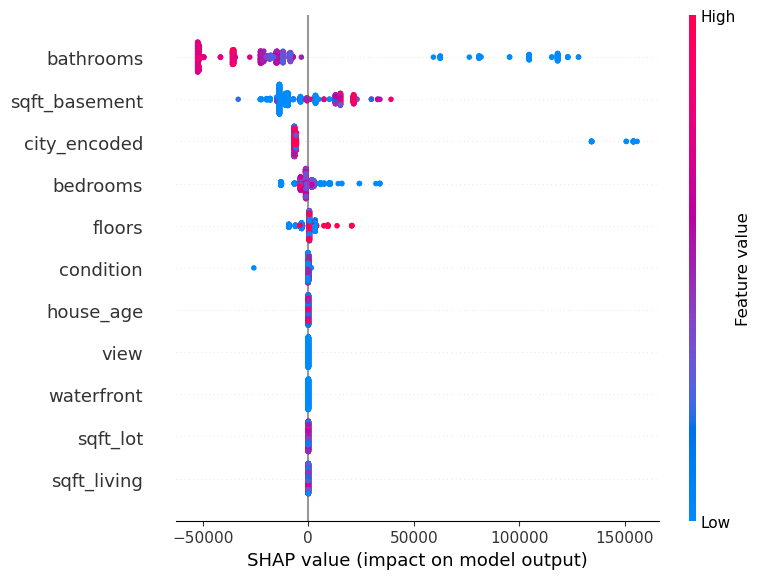

In [16]:
import shap
xgb_model = XGB_pipeline.named_steps['regressor']  
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [17]:
##Summary of Key Insights:
# ✅More bathrooms, larger living space, and a waterfront view increase price.
# ✅ Location is crucial—some areas push prices up while others lower them.
# ✅ The number of bedrooms alone does not strongly determine price.
# ✅ House condition and age play a role but not as much as sqft_living.

